# Embeddings  Dimensionality Reduction

Embeddings model: BERT

Category: types of news categories

#### Setup

In [1]:
#!pip install wordcloud Levenshtein

In [71]:
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
from sklearn.decomposition import PCA
import umap

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
pd.set_option('max_colwidth', 1000)
SEED=42
notebook_start_time = time.time()

### Data Acces

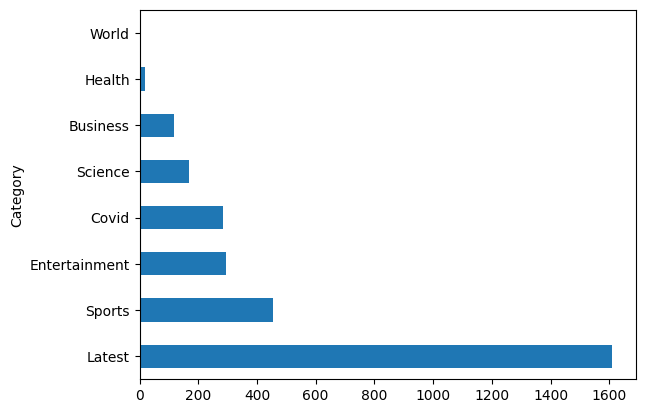

In [33]:
# processed data from Embeddings/hugging_face_bert.ipynb
dataframe = pd.read_parquet('../Datasets/pre_processed_dataframes/embeddings_df.parquet')
dataframe = dataframe[dataframe['language_name'] == 'English'].copy()
ax = dataframe['Category'].value_counts().plot(kind='barh')

## Dimensionality Reduction Techniques

In [44]:
X = np.vstack(dataframe['embeddings_full_description'].values)
categories = dataframe['Category'].values

### **TSNE - T-distributed Stochastic Neighbor Embedding**

**Perplexity**: Defines the number of neighbors considered for each point during the construction of the similarity matrix.

* It must be smaller than the number of samples.
* The model's developer suggests a perplexity value between 5 and 50.

**Early Exaggeration**: Increases the initial separation of clusters in the lower-dimensional space, preventing clusters from overlapping.


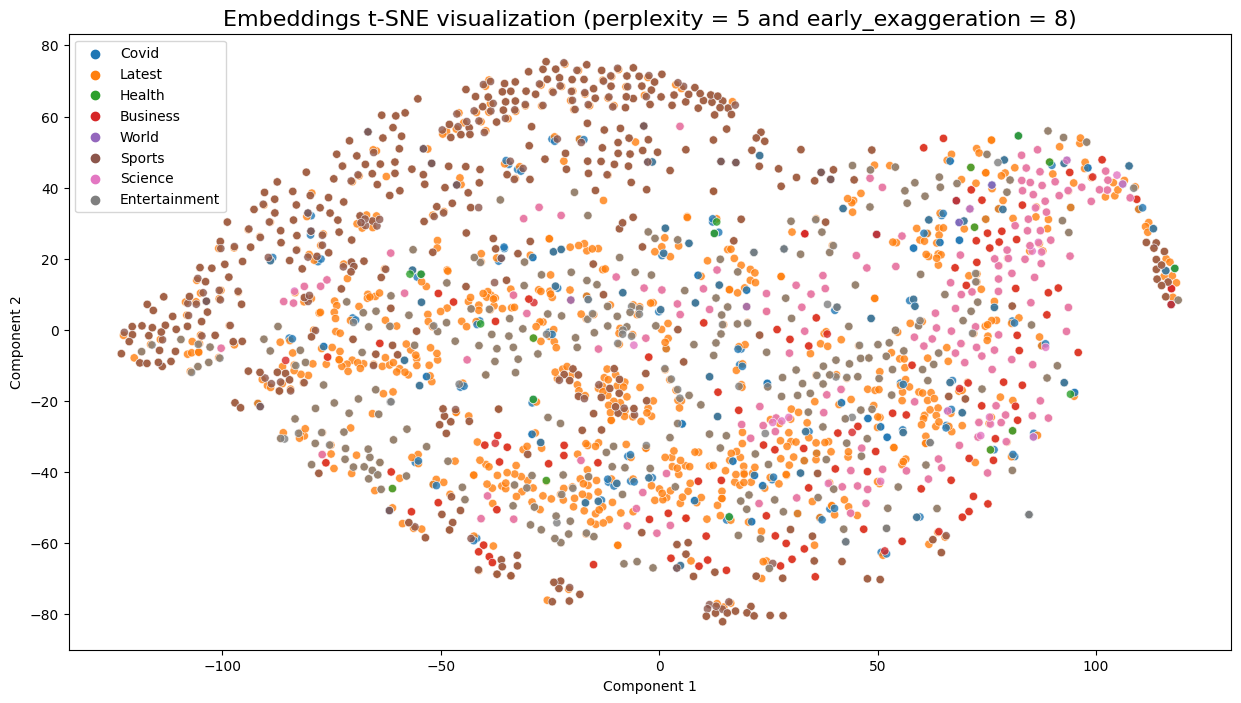

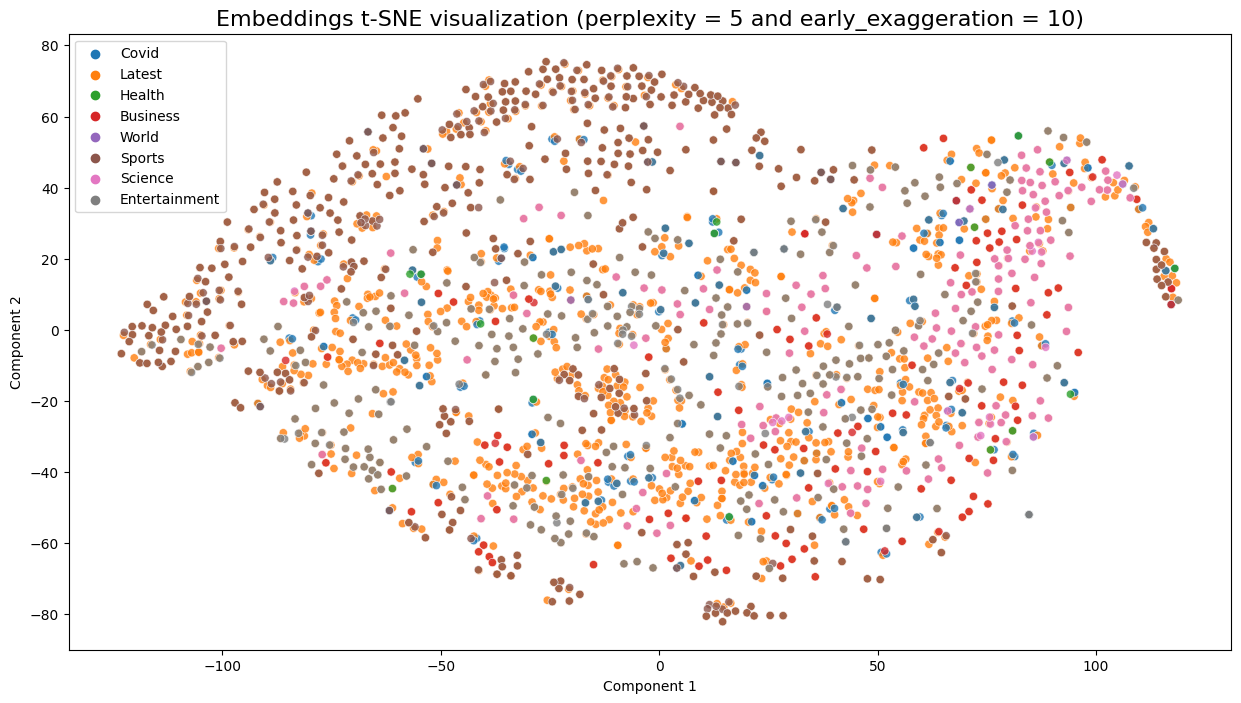

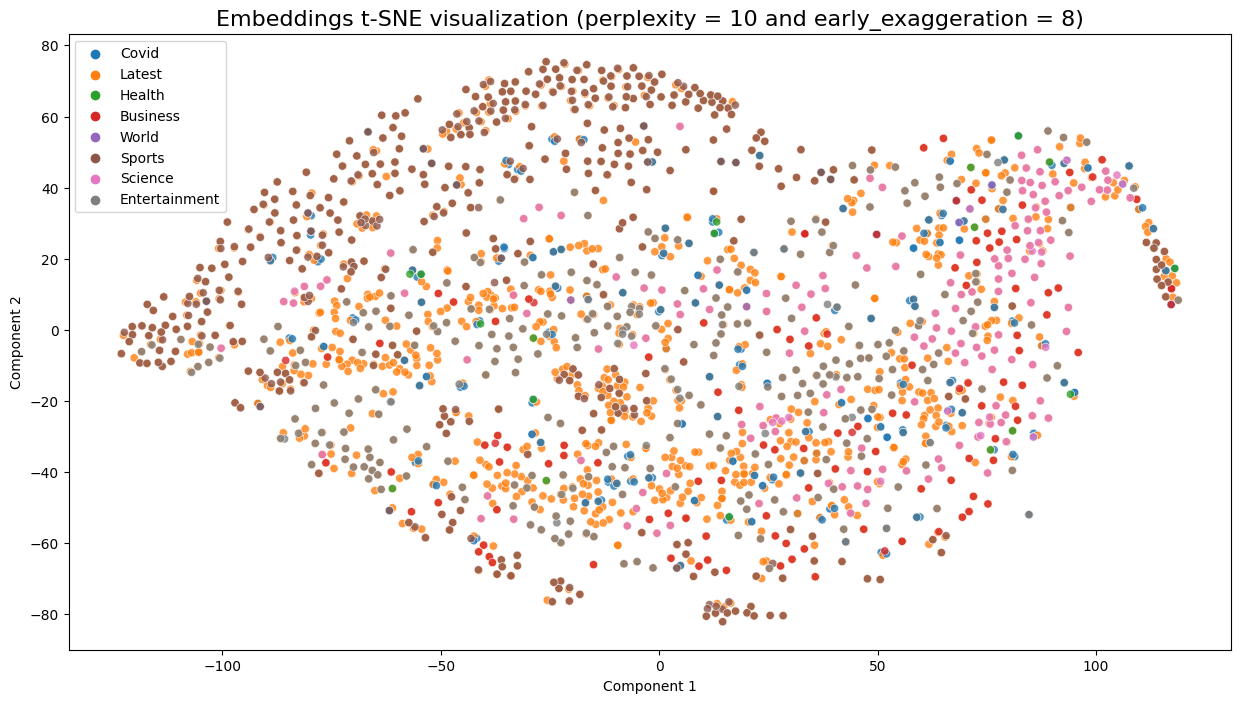

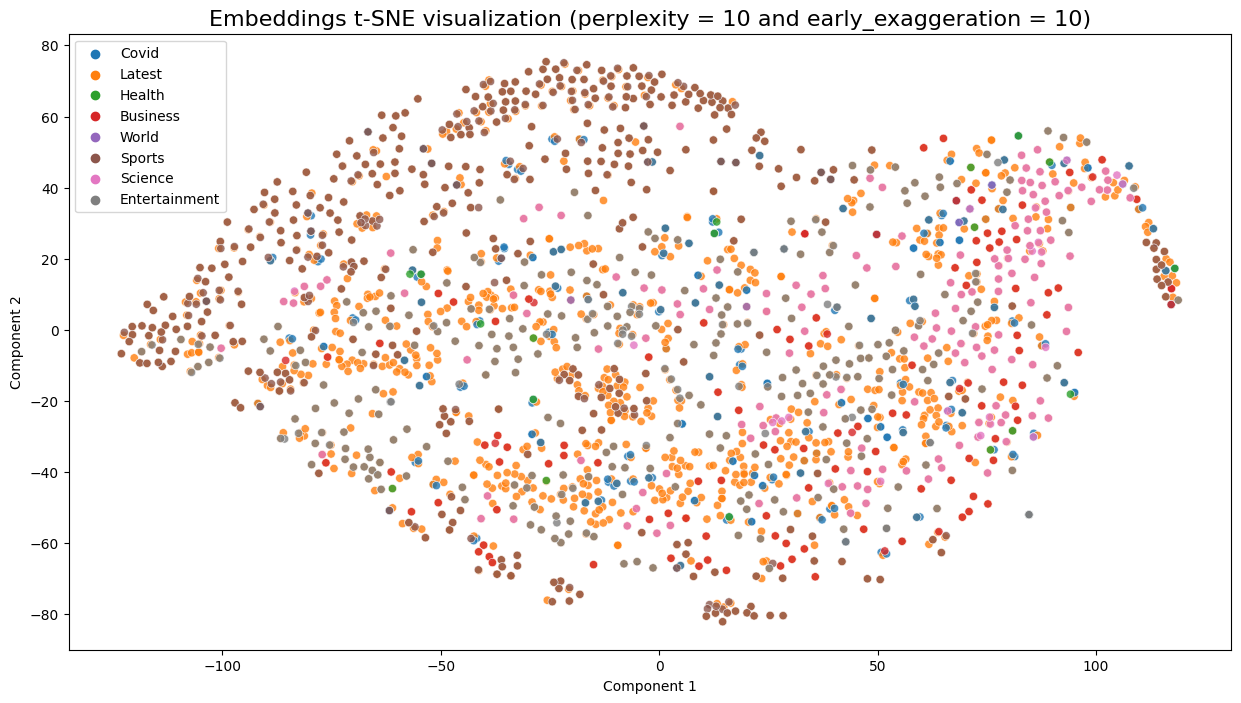

In [45]:
# recommended range 5-50
perplexity_range = 15
# recommended range 8-20
early_exaggeration_range = 12

for perplexity in np.arange(5, perplexity_range, step=5):    
    for early_exaggeration in np.arange(8, early_exaggeration_range, step=2):    
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X)
        fig = plt.figure(figsize=(15, 8))
        ax = sea.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], alpha=0.8, hue=categories)
        ax = plt.xlabel('Component 1')
        ax = plt.ylabel('Component 2')
        ax = plt.title(f'Embeddings t-SNE visualization (perplexity = {perplexity} and early_exaggeration = {early_exaggeration})', fontsize=16)
        plt.show()

### PCA (Principal Component Analysis)

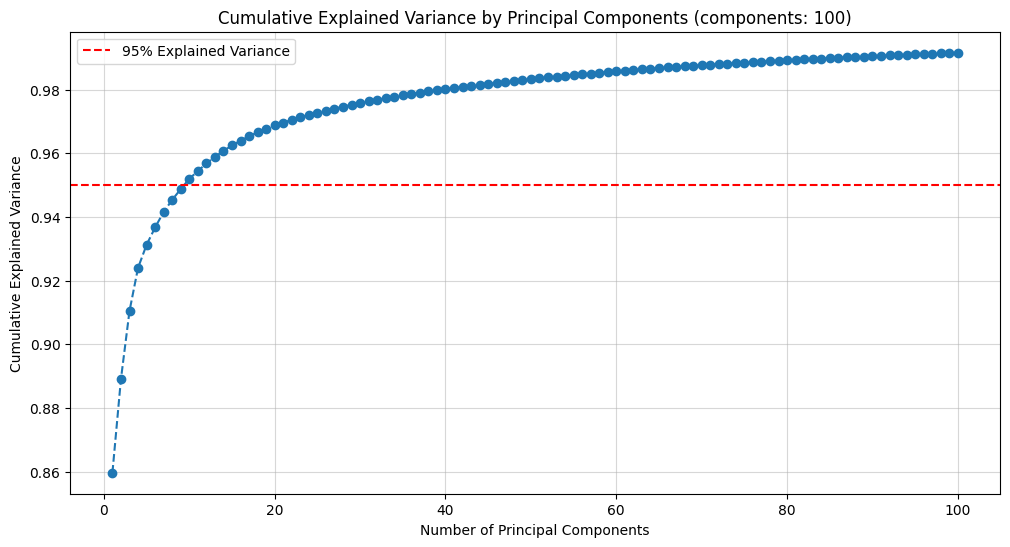

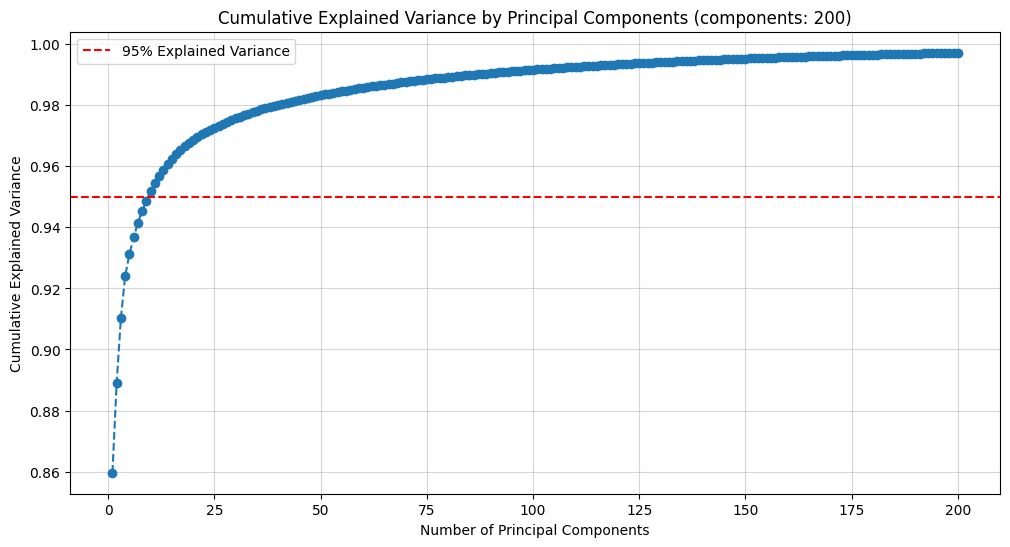

In [65]:
range_components = int(X[0].shape[0]/3)
for n in np.arange(100, range_components, step=100):
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    fig = plt.figure(figsize=(12, 6))        
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.title(f'Cumulative Explained Variance by Principal Components (components: {n})')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(alpha=0.5)
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')        
    plt.legend()
    plt.show()            

### UMAP (Uniform Manifold Approximation and Projection)

UMAP is a dimensionality reduction technique that, like t-SNE, reduces data to 2 or 3 dimensions, but it is more computationally efficient and preserves both local and global structure.

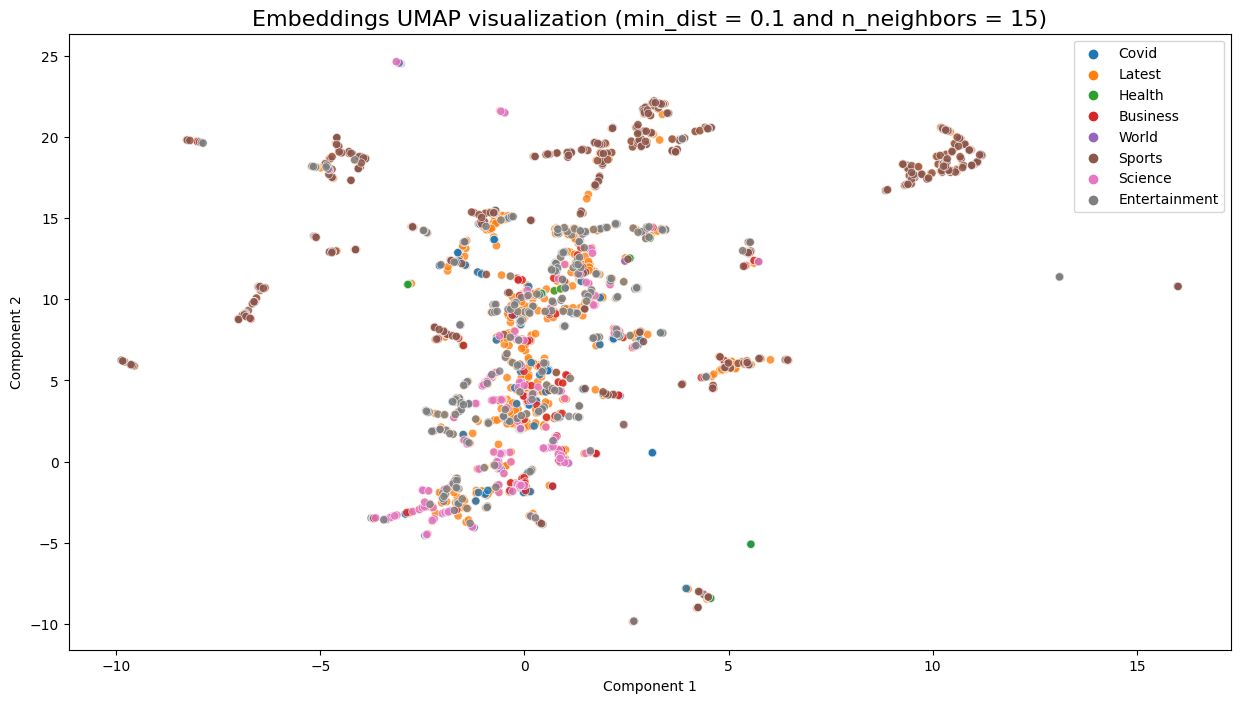

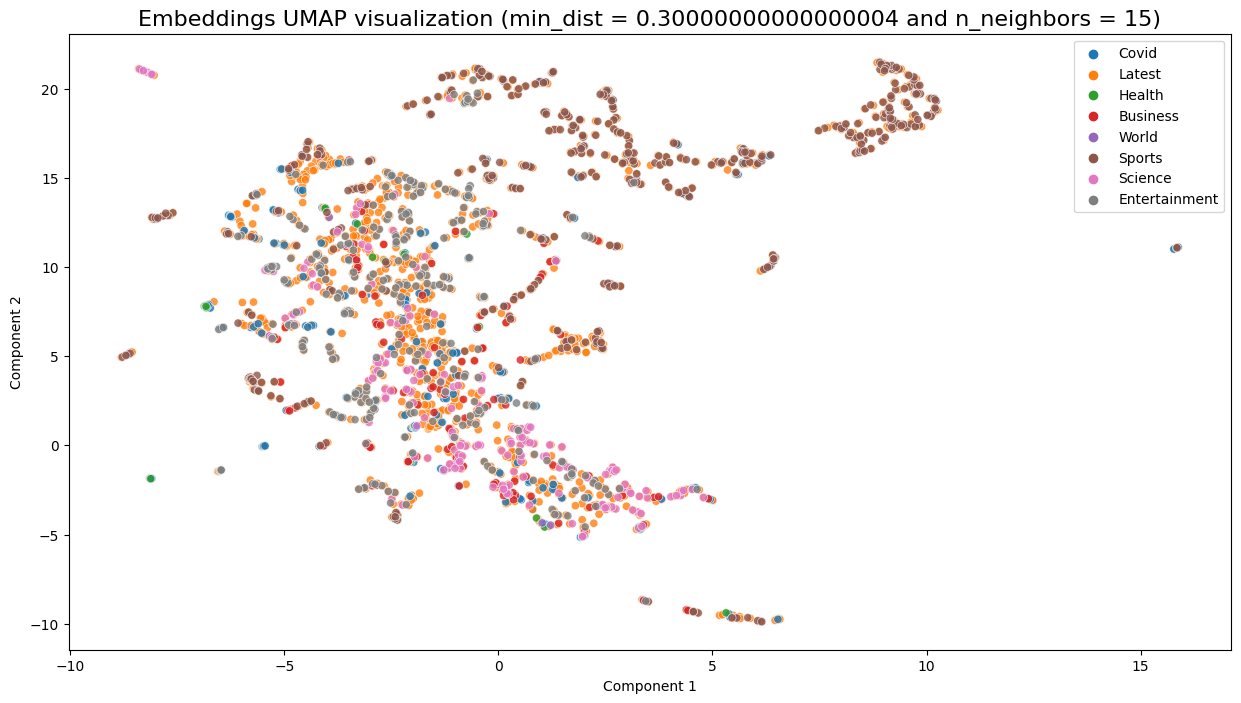

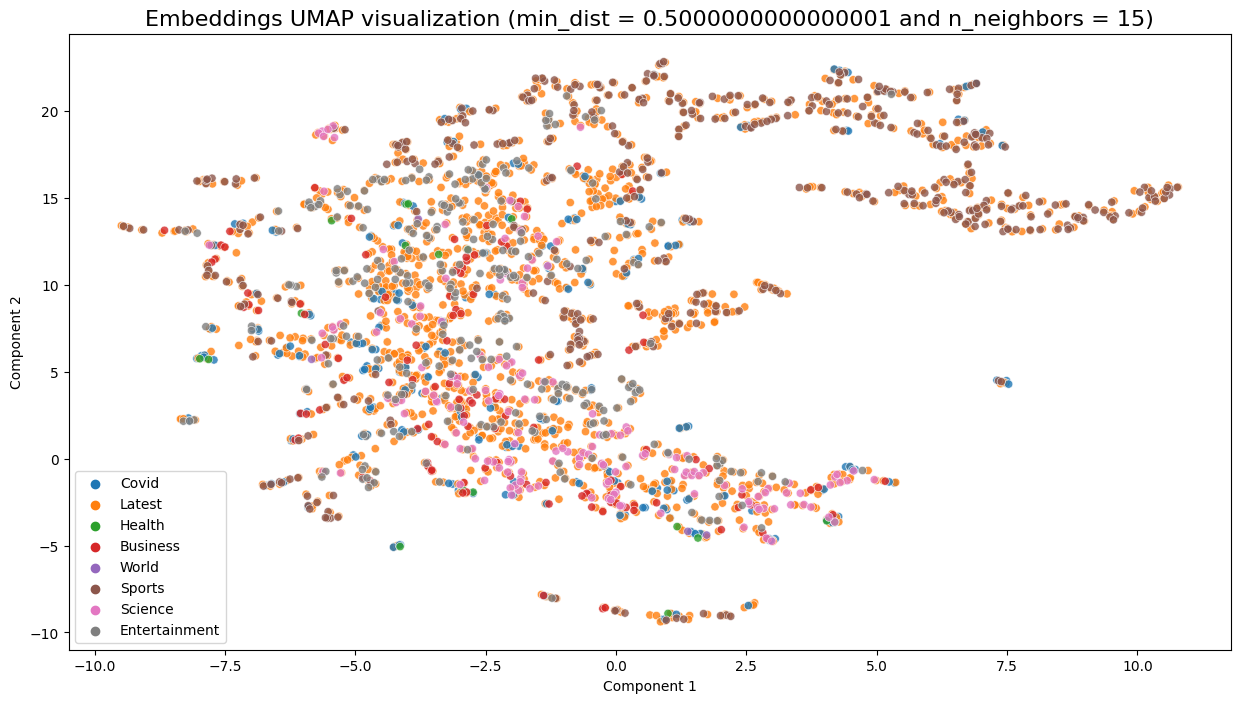

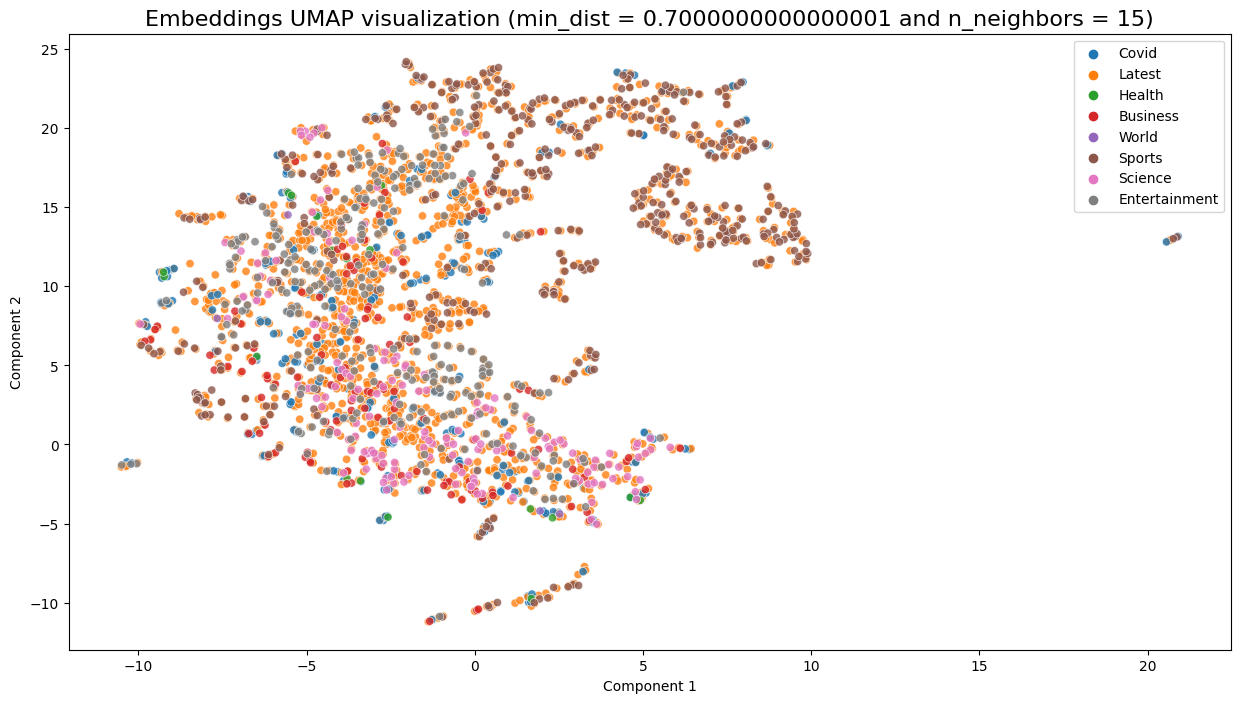

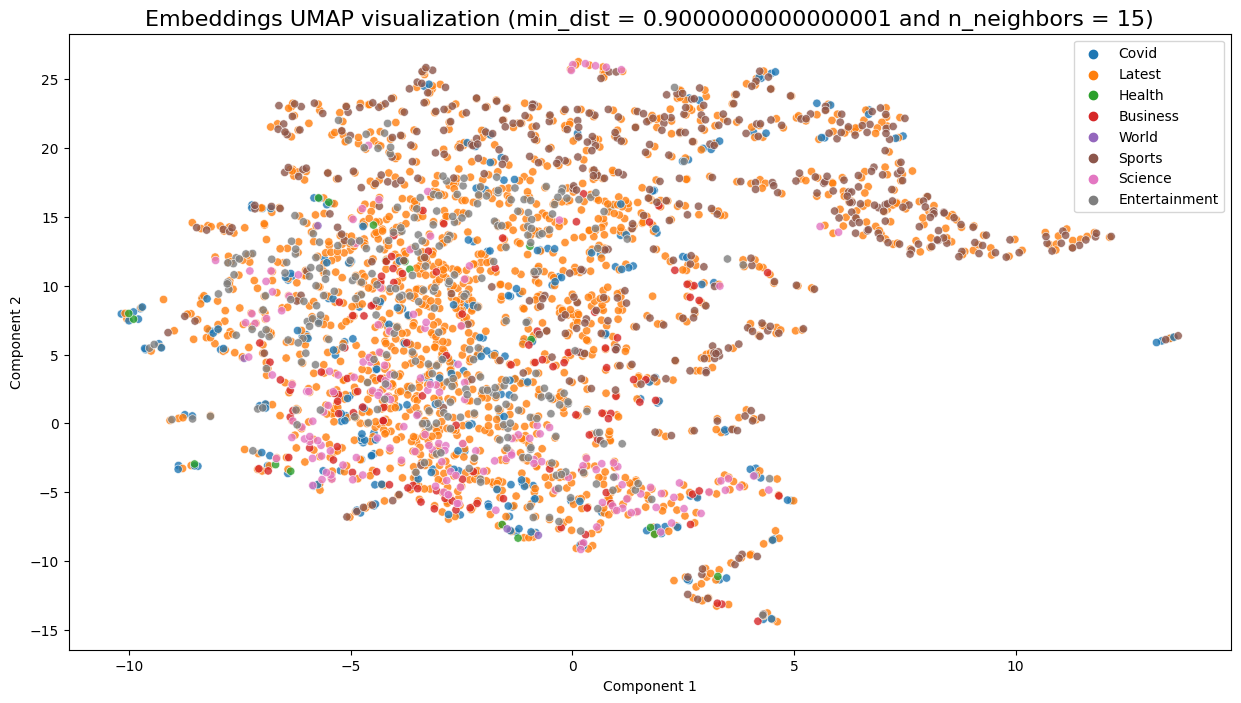

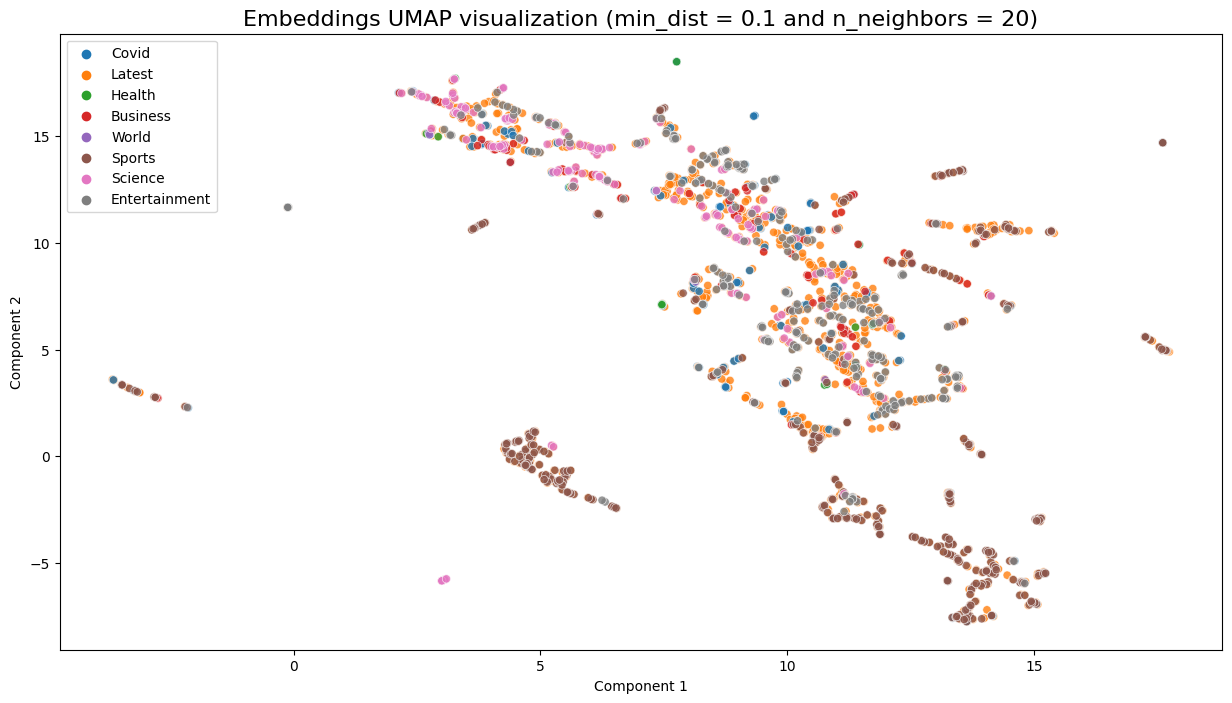

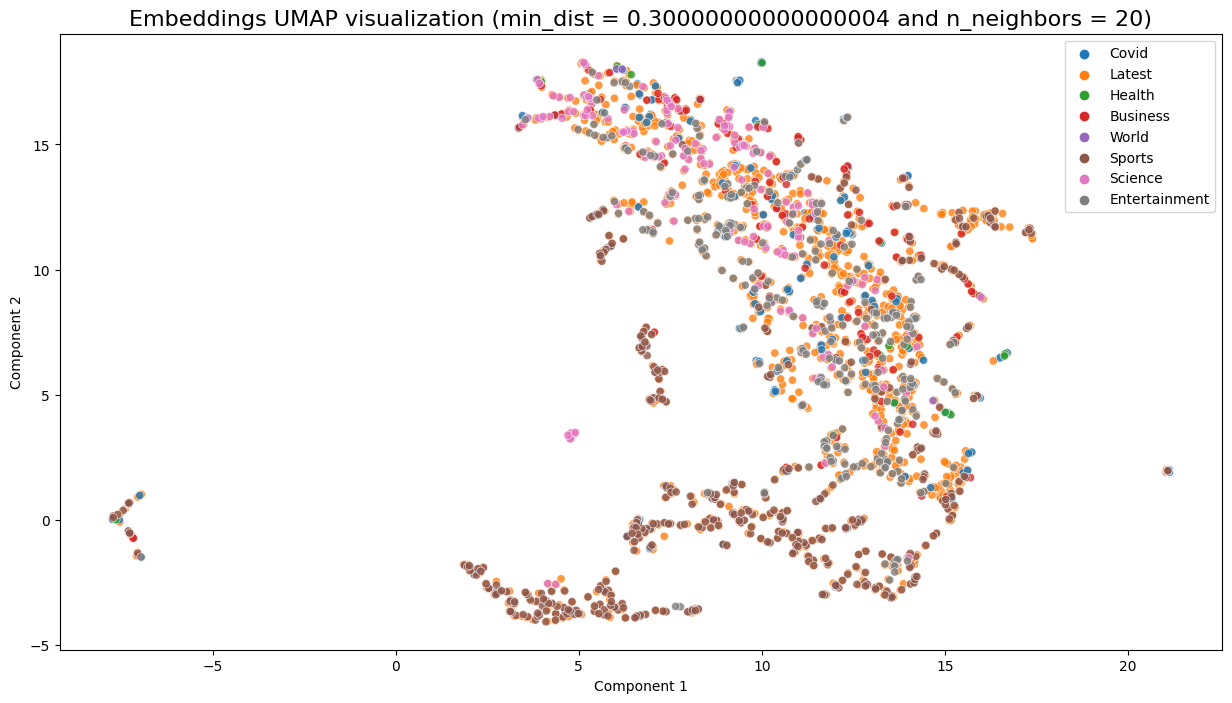

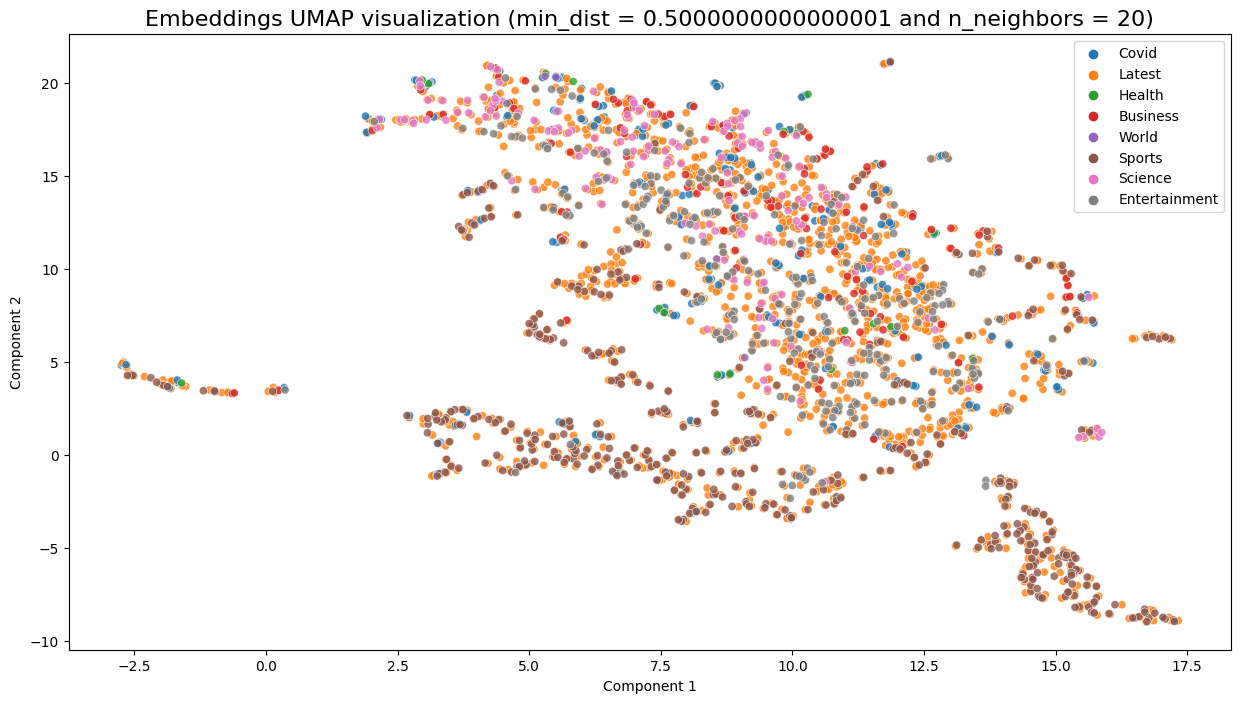

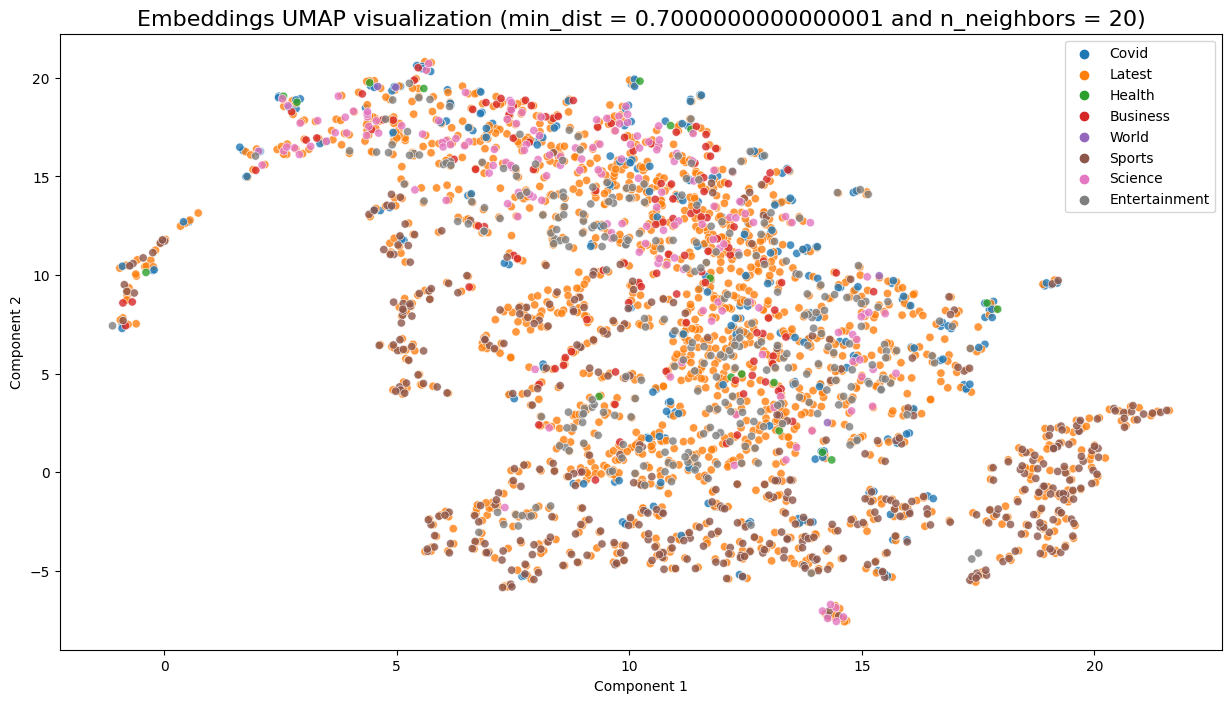

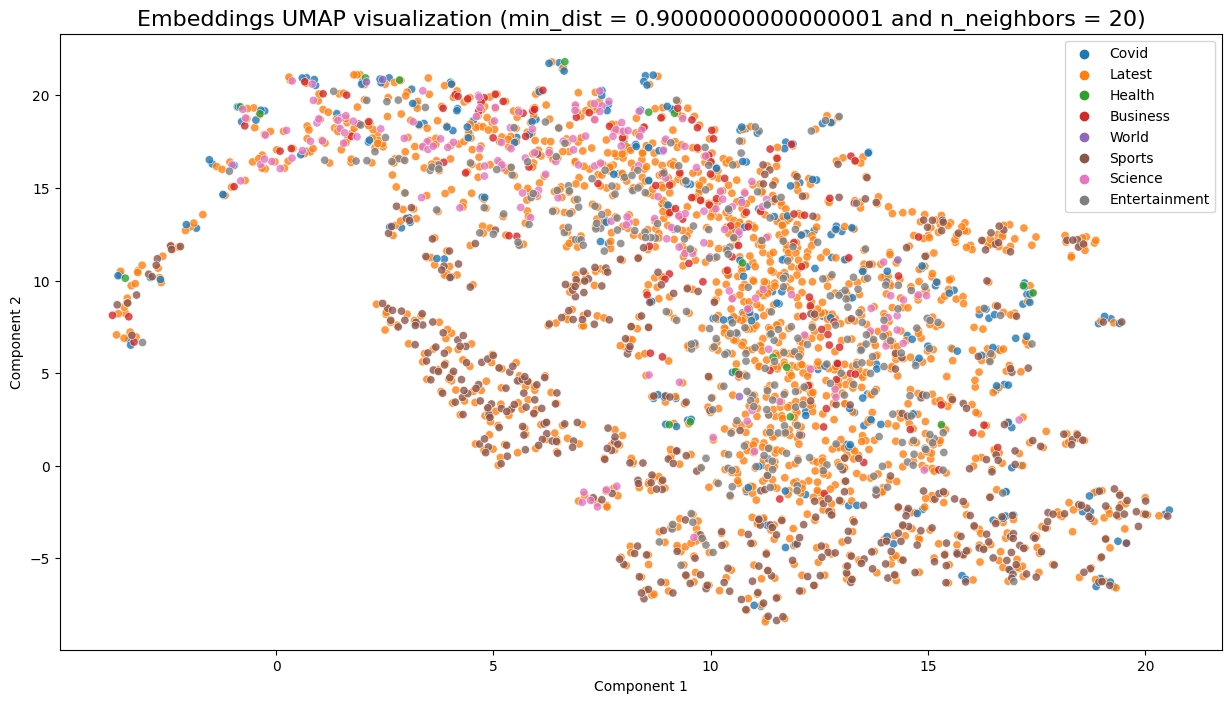

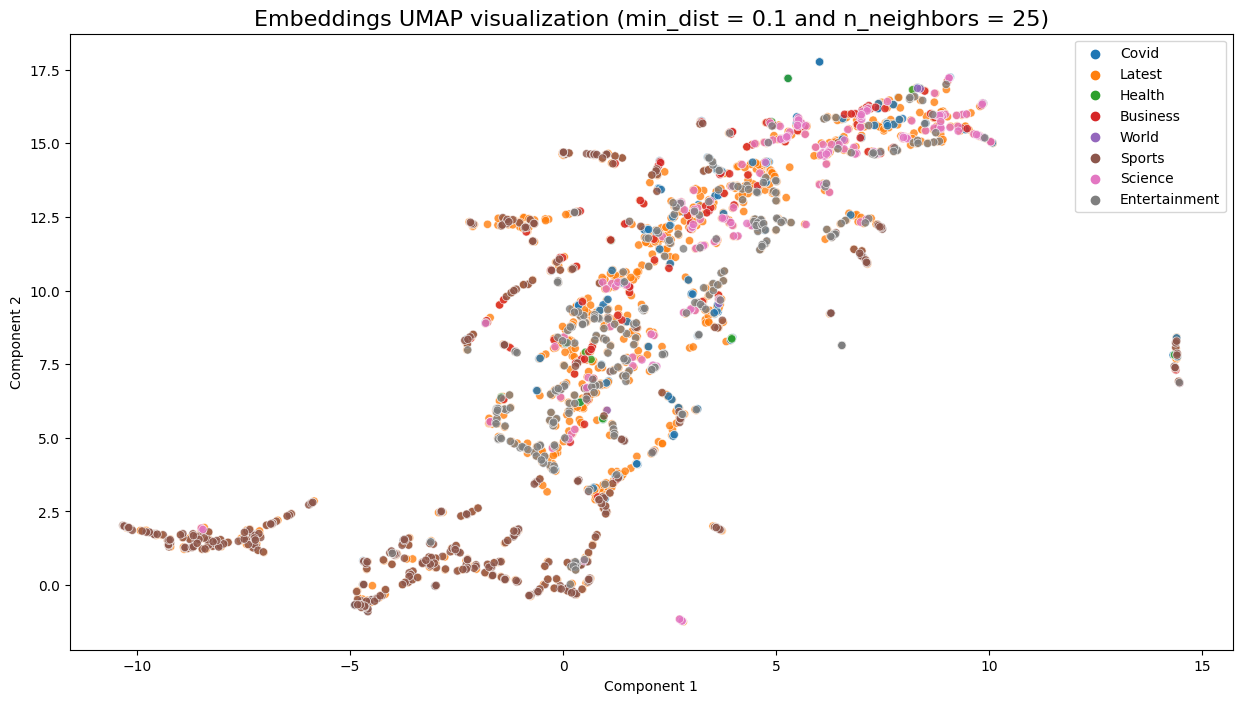

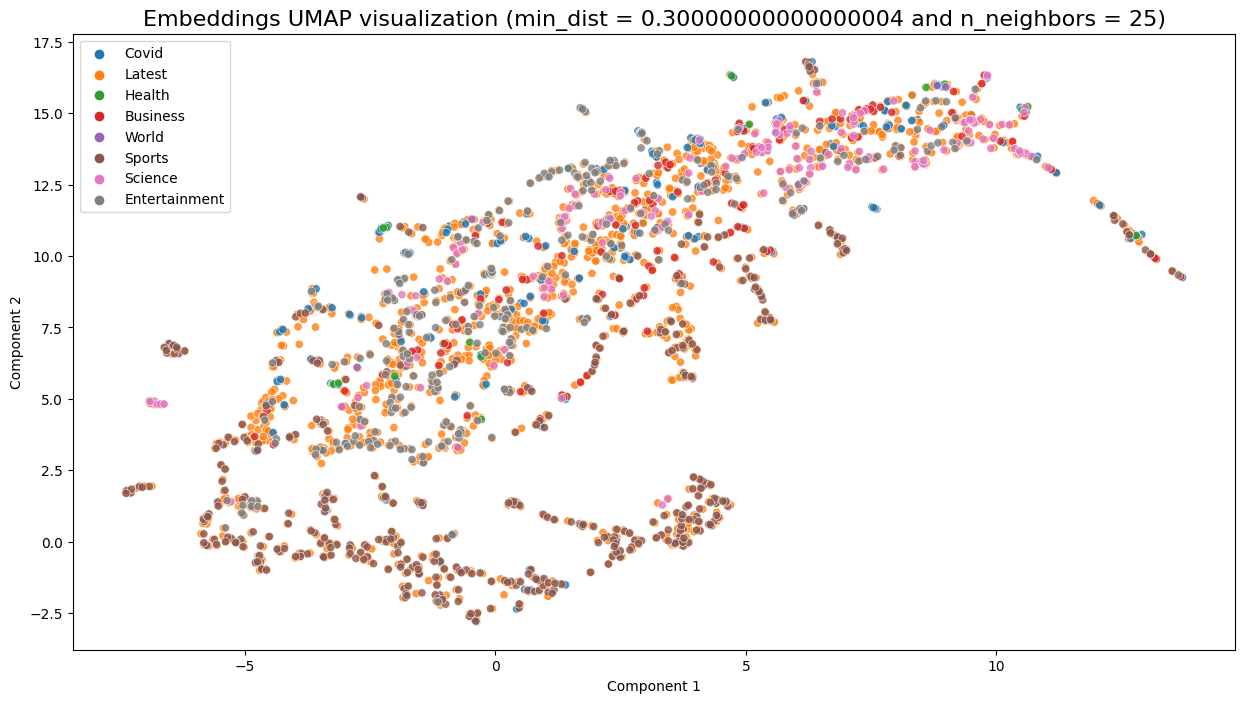

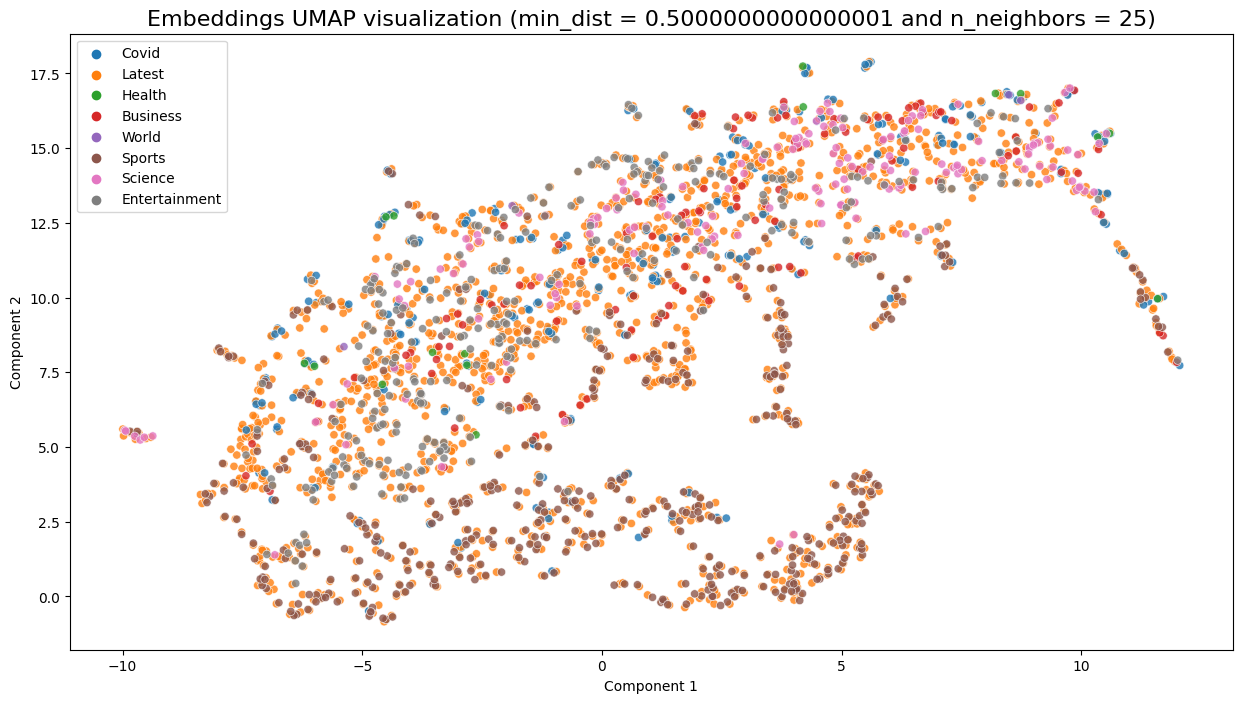

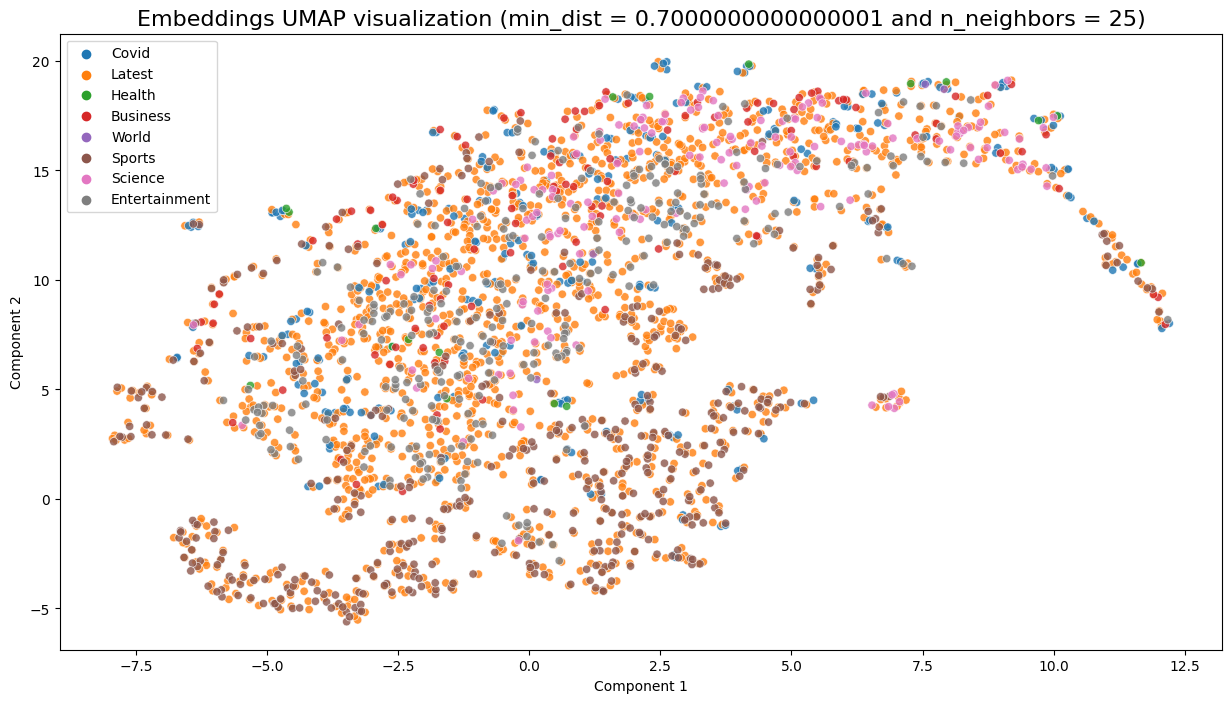

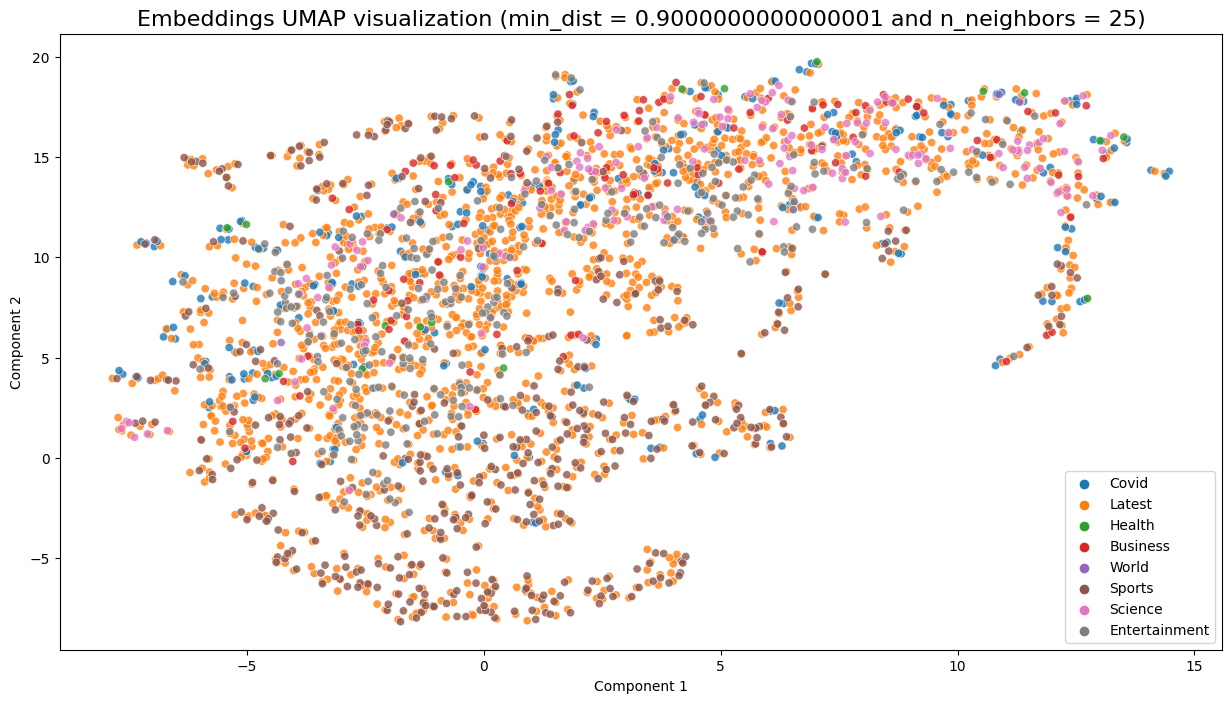

In [81]:
n_neighbors_range = 30
min_dist_range = 1
for n in np.arange(15, n_neighbors_range, step=5):
    for d in np.arange(0.1, min_dist_range, step=0.2):
        umap_model = umap.UMAP(n_components=2, 
                            metric='cosine',
                            min_dist = d,
                            n_neighbors = n,
                            random_state=42)
        X_umap = umap_model.fit_transform(X)

        fig = plt.figure(figsize=(15, 8))
        ax = sea.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.8, hue=categories)
        ax = plt.xlabel('Component 1')
        ax = plt.ylabel('Component 2')
        ax = plt.title(f'Embeddings UMAP visualization (min_dist = {d} and n_neighbors = {n})', fontsize=16)
        plt.show()
